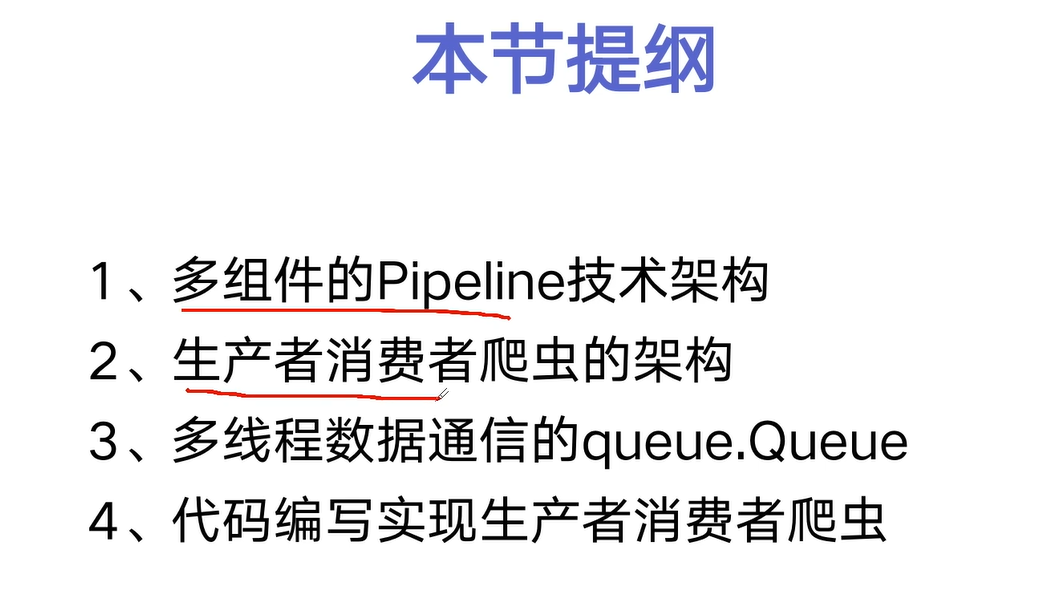

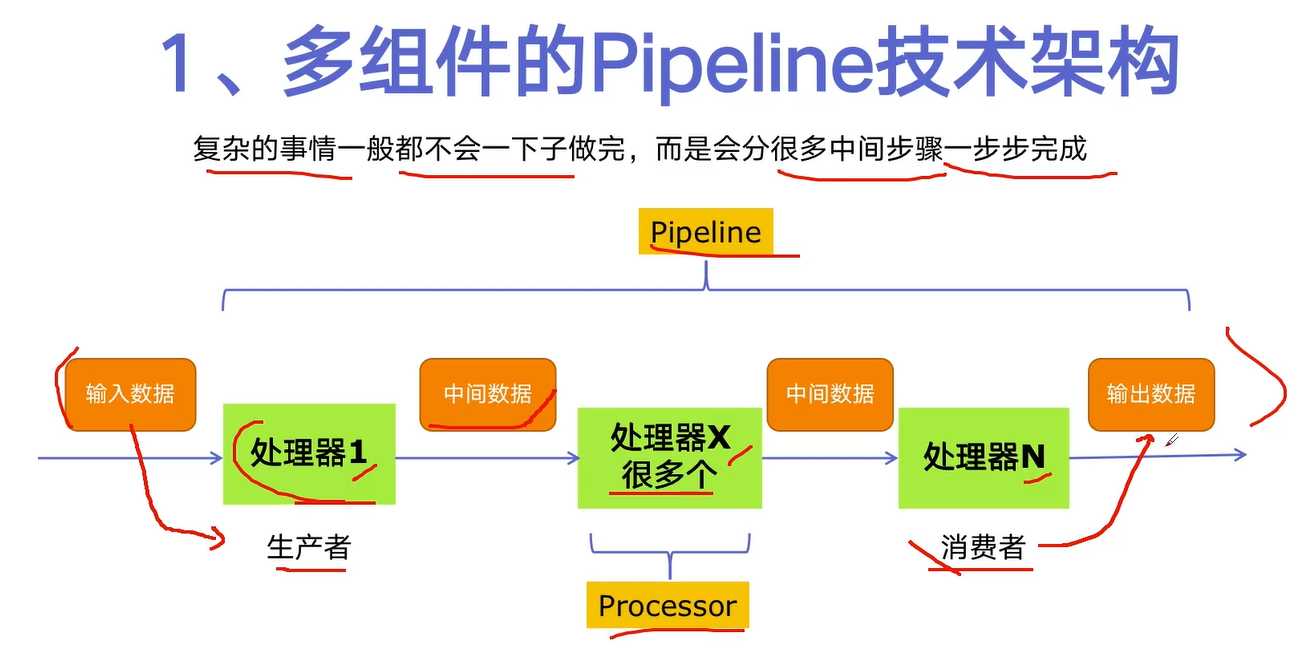

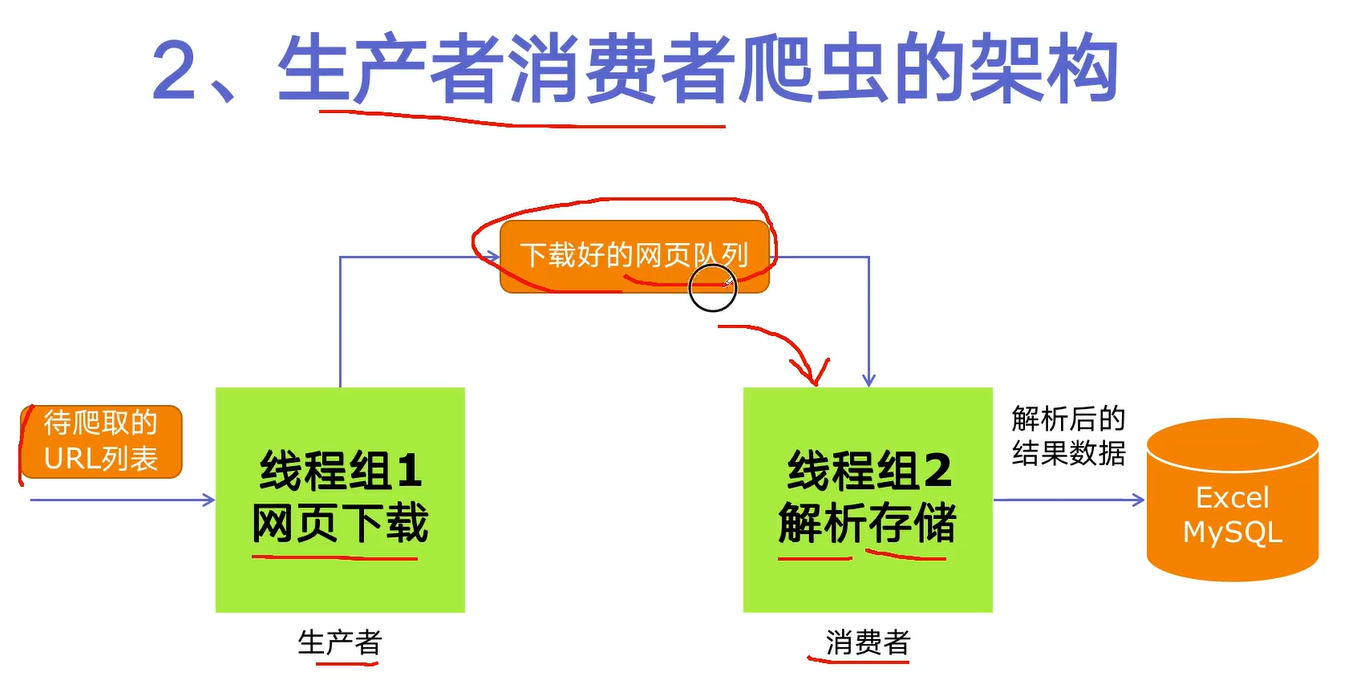

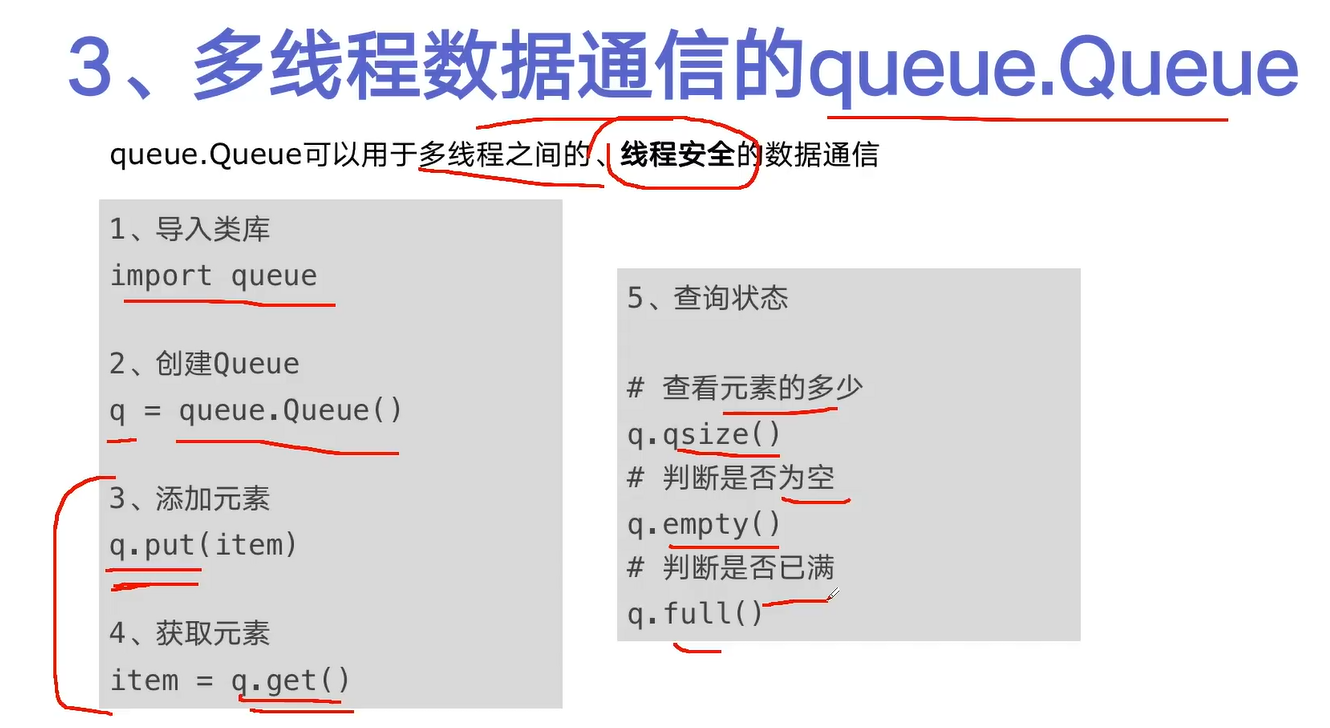

# 代码：

In [3]:
import queue
import time
import random
import threading
import requests
from bs4 import BeautifulSoup

urls = [
    f"https://www.cnblogs.com/sitehome/p/{page}"
    for page in range(1, 50 + 1)
]


def craw(url):
    #print("craw url: ", url)
    r = requests.get(url)
    return r.text


def parse(html):
    # class="post-item-title"
    soup = BeautifulSoup(html, "html.parser") # 解析网页
    links = soup.find_all("a", class_="post-item-title")
    return [(link["href"], link.get_text()) for link in links]


def do_craw(url_queue: queue.Queue, html_queue: queue.Queue): # 生产者：爬取
    while True:
        url = url_queue.get()
        html = craw(url)
        html_queue.put(html)
        print(threading.current_thread().name, f"craw {url}",
              "url_queue.size=", url_queue.qsize())
        time.sleep(random.randint(1, 2))


def do_parse(html_queue: queue.Queue, fout): # 消费者：解析数据
    while True:
        html = html_queue.get()
        results = parse(html)
        for result in results:
            fout.write(str(result) + "\n")
        print(threading.current_thread().name, f"results.size", len(results),
              "html_queue.size=", html_queue.qsize())
        time.sleep(random.randint(1, 2))


if __name__ == "__main__":
    url_queue = queue.Queue()
    html_queue = queue.Queue()
    for url in urls:
        url_queue.put(url)

    for idx in range(3): # 三个生产者线程
        t = threading.Thread(target=do_craw, args=(url_queue, html_queue),
                             name=f"craw{idx}")
        t.start()

    fout = open("02.data.txt", "w")
    for idx in range(2): # 两个消费者线程
        t = threading.Thread(target=do_parse, args=(html_queue, fout),
                             name=f"parse{idx}")
        t.start()

craw1 craw https://www.cnblogs.com/sitehome/p/2 url_queue.size= 47
craw2 craw https://www.cnblogs.com/sitehome/p/3 url_queue.size= 47
craw0 craw https://www.cnblogs.com/sitehome/p/1 url_queue.size= 47
parse1 results.size 20 html_queue.size= 1
parse0 results.size 20 html_queue.size= 1
parse1 results.size 20 html_queue.size= 0
craw1parse0 results.size 20 html_queue.size= 0
 craw https://www.cnblogs.com/sitehome/p/4 url_queue.size= 44
craw2 craw https://www.cnblogs.com/sitehome/p/6 url_queue.size= 44
craw0 craw https://www.cnblogs.com/sitehome/p/5 url_queue.size= 44
parse1 results.size 20 html_queue.size= 1
craw1 craw https://www.cnblogs.com/sitehome/p/7 url_queue.size= 43
parse0 results.size 20 html_queue.size= 1
craw2 craw https://www.cnblogs.com/sitehome/p/8 url_queue.size= 41
craw0 craw https://www.cnblogs.com/sitehome/p/9 url_queue.size= 41
parse1 results.size 20 html_queue.size= 2
craw1 craw https://www.cnblogs.com/sitehome/p/10 url_queue.size= 40
parse0 results.size 20 html_queue.s

Exception in thread parse0:
Traceback (most recent call last):
  File "D:\Anaconda3\lib\threading.py", line 932, in _bootstrap_inner
    self.run()
  File "D:\Anaconda3\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-3-64912ff398ef>", line 42, in do_parse
UnicodeEncodeError: 'gbk' codec can't encode character '\u2615' in position 54: illegal multibyte sequence


parse1 results.size 20 html_queue.size= 3
craw0 craw https://www.cnblogs.com/sitehome/p/28 url_queue.size= 21
craw1 craw https://www.cnblogs.com/sitehome/p/27 url_queue.size= 21
craw2 craw https://www.cnblogs.com/sitehome/p/29 url_queue.size= 21
parse1 results.size 20 html_queue.size= 4
craw1 craw https://www.cnblogs.com/sitehome/p/30 url_queue.size= 19
craw2 craw https://www.cnblogs.com/sitehome/p/31 url_queue.size= 19
parse1 results.size 20 html_queue.size= 5
craw0 craw https://www.cnblogs.com/sitehome/p/32 url_queue.size= 18
parse1 results.size 20 html_queue.size= 5
craw2 craw https://www.cnblogs.com/sitehome/p/33 url_queue.size= 17
craw1 craw https://www.cnblogs.com/sitehome/p/35 url_queue.size= 15
parse1 results.size 20 html_queue.size= 6
craw2 craw https://www.cnblogs.com/sitehome/p/36 url_queue.size= 14
parse1 results.size 20 html_queue.size= 6
craw0 craw https://www.cnblogs.com/sitehome/p/34 url_queue.size= 13
craw1 craw https://www.cnblogs.com/sitehome/p/37 url_queue.size= 13


Exception in thread parse1:
Traceback (most recent call last):
  File "D:\Anaconda3\lib\threading.py", line 932, in _bootstrap_inner
    self.run()
  File "D:\Anaconda3\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-3-64912ff398ef>", line 42, in do_parse
UnicodeEncodeError: 'gbk' codec can't encode character '\U0001f3c6' in position 54: illegal multibyte sequence
